<img src="https://miro.medium.com/max/647/1*ZOcUPrSXLYucFxppoI-dYg.png">

# Problem definition


For this project we are using a car dataset, where we want to predict the selling price of car based on its certain features.
Since we need to find the real value, with real calculation, therefore this problem is regression problem. 
We will be using linear regression to solve this problem.

General equation of Multiple Linear Regression:
$$y = \beta_0 + \beta_{1}x_1 + \beta_{2}x_2 + \beta_{3}x_3 + \beta_{4}x_4 + ... + \beta_{n}x_n$$

# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Gathering

In [2]:
df = pd.read_csv("car_dataset.csv")
pd.set_option("display.max_columns", None)

# Data Preparation

In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0


In [7]:
df.shape

(301, 9)

# Feature Engineering

<ul>Fuel_Type feature:
    <li>Fuel is Petrol if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 1</li>
    <li>Fuel is Diesel if Fuel_type_diesel = 1 ,Fuel_Type_Petrol = 0</li>
    <li>Fuel is cng if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 0</li>
   </ul>
<ul>Transmission feature:
    <li>transmission is manual if Transmission_Manual = 1</li> 
    <li>transmission is automatic if Transmission_Manual = 0</li></ul>
<ul>Seller_Type feature:
    <li>Seller_Type is Individual if Seller_Type_Individual = 1 </li> 
    <li>Seller_Type is dealer if Seller_Type_Individual = 0</li> </ul>
    


### Features and target variable

In [10]:
df.Fuel_Type.unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [11]:
df1 = pd.get_dummies(df, drop_first=True) # drop_first 0 ve 1 olarak sütün sayısını fazla artırmadan 

In [13]:
df1.sample(5)

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,Car_Name_Bajaj Avenger 220,Car_Name_Bajaj Avenger 220 dtsi,Car_Name_Bajaj Avenger Street 220,Car_Name_Bajaj Discover 100,Car_Name_Bajaj Discover 125,Car_Name_Bajaj Dominar 400,Car_Name_Bajaj Pulsar NS 200,Car_Name_Bajaj Pulsar 135 LS,Car_Name_Bajaj Pulsar 150,Car_Name_Bajaj Pulsar 220 F,Car_Name_Bajaj Pulsar NS 200,Car_Name_Bajaj Pulsar RS200,Car_Name_Hero CBZ Xtreme,Car_Name_Hero Ignitor Disc,Car_Name_Hero Extreme,Car_Name_Hero Glamour,Car_Name_Hero Honda CBZ extreme,Car_Name_Hero Honda Passion Pro,Car_Name_Hero Hunk,Car_Name_Hero Passion Pro,Car_Name_Hero Passion X pro,Car_Name_Hero Splender Plus,Car_Name_Hero Splender iSmart,Car_Name_Hero Super Splendor,Car_Name_Honda Activa 125,Car_Name_Honda Activa 4G,Car_Name_Honda CB Hornet 160R,Car_Name_Honda CB Shine,Car_Name_Honda CB Trigger,Car_Name_Honda CB Unicorn,Car_Name_Honda CB twister,Car_Name_Honda CBR 150,Car_Name_Honda Dream Yuga,Car_Name_Honda Karizma,Car_Name_Hyosung GT250R,Car_Name_KTM 390 Duke,Car_Name_KTM RC200,Car_Name_KTM RC390,Car_Name_Mahindra Mojo XT300,Car_Name_Royal Enfield Bullet 350,Car_Name_Royal Enfield Classic 350,Car_Name_Royal Enfield Classic 500,Car_Name_Royal Enfield Thunder 350,Car_Name_Royal Enfield Thunder 500,Car_Name_Suzuki Access 125,Car_Name_TVS Apache RTR 160,Car_Name_TVS Apache RTR 180,Car_Name_TVS Jupyter,Car_Name_TVS Sport,Car_Name_TVS Wego,Car_Name_UM Renegade Mojave,Car_Name_Yamaha FZ v 2.0,Car_Name_Yamaha FZ 16,Car_Name_Yamaha FZ S,Car_Name_Yamaha FZ S V 2.0,Car_Name_Yamaha Fazer,Car_Name_alto 800,Car_Name_alto k10,Car_Name_amaze,Car_Name_baleno,Car_Name_brio,Car_Name_camry,Car_Name_ciaz,Car_Name_city,Car_Name_corolla,Car_Name_corolla altis,Car_Name_creta,Car_Name_dzire,Car_Name_elantra,Car_Name_eon,Car_Name_ertiga,Car_Name_etios cross,Car_Name_etios g,Car_Name_etios gd,Car_Name_etios liva,Car_Name_fortuner,Car_Name_grand i10,Car_Name_i10,Car_Name_i20,Car_Name_ignis,Car_Name_innova,Car_Name_jazz,Car_Name_land cruiser,Car_Name_omni,Car_Name_ritz,Car_Name_s cross,Car_Name_swift,Car_Name_sx4,Car_Name_verna,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
129,2017,0.78,0.84,5000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
5,2018,9.25,9.83,2071,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
283,2016,8.99,11.80,9010,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
149,2016,0.51,0.94,24000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
12,2015,7.50,9.94,15000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [14]:
df1.shape

(301, 106)

In [17]:
df1 = df.drop("Car_Name",axis=1)
df1

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [18]:
df1 = pd.get_dummies(df1,drop_first = True)

In [22]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0
Fuel_Type_Diesel,301.0,0.199336,0.400166,0.00,0.0,0.0,0.0,1.0
Fuel_Type_Petrol,301.0,0.794020,0.405089,0.00,1.0,1.0,1.0,1.0
Seller_Type_Individual,301.0,0.352159,0.478439,0.00,0.0,0.0,1.0,1.0
Transmission_Manual,301.0,0.867110,0.340021,0.00,1.0,1.0,1.0,1.0


In [27]:
df1[["Kms_Driven","Year"]].sample(10)

,Kms_Driven,Year
123,46500,2013
145,19000,2012
212,22671,2016
230,45000,2013
257,40324,2015
60,40001,2013
293,38000,2010
46,64532,2013
214,20114,2017
213,31604,2011


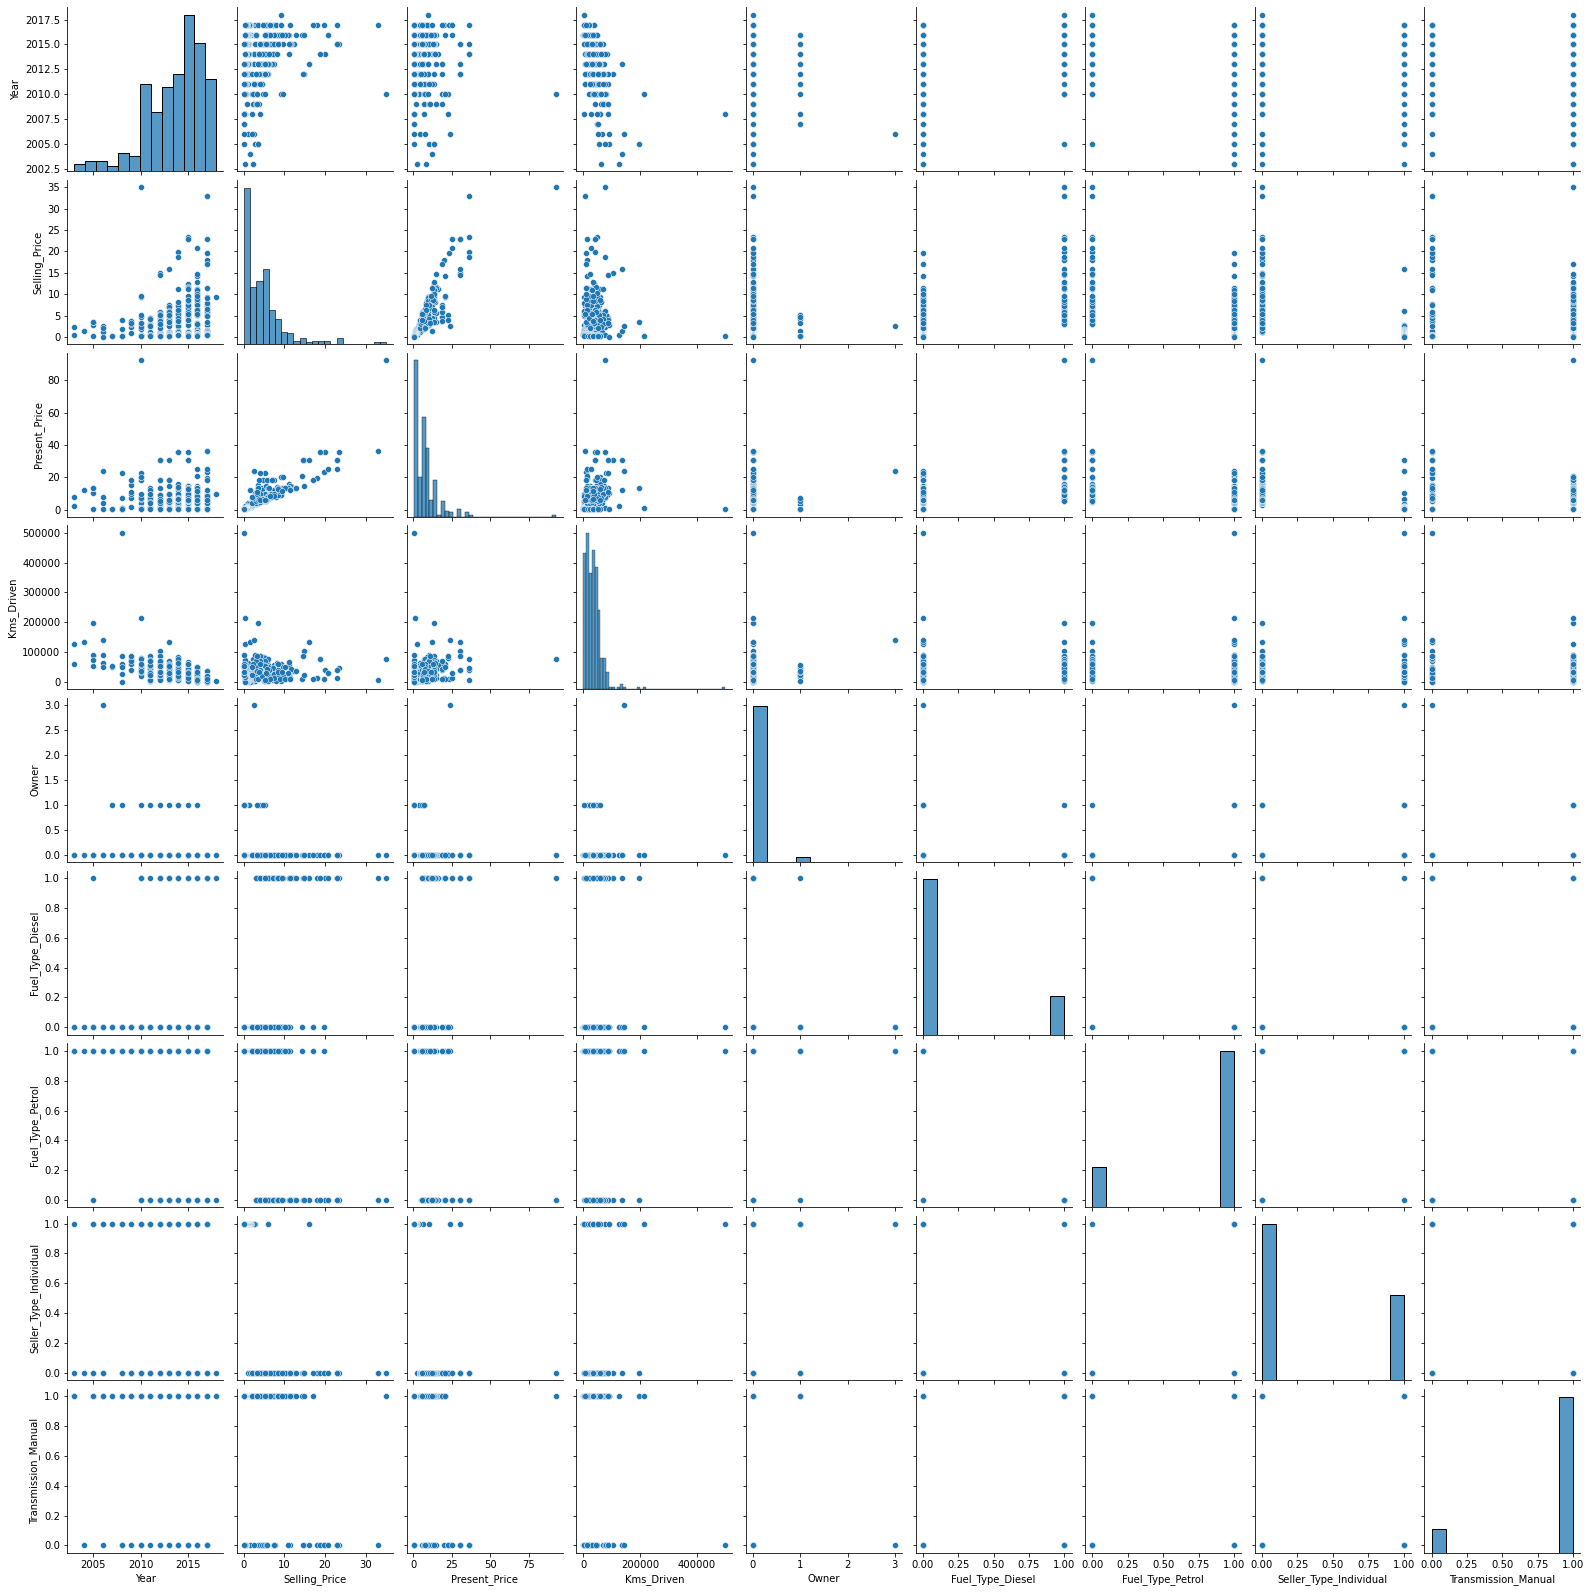

In [29]:
sns.pairplot(df1)

<AxesSubplot:>

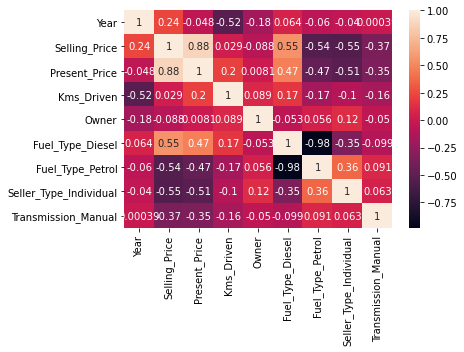

In [33]:
sns.heatmap(df1.corr(), annot =True)

### Splitting data into training and testing

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X = df1.drop(columns="Selling_Price")
y = df1.Selling_Price

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=42)

In [39]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)


Train features shape :  (240, 8)
Train target shape   :  (240,)
Test features shape  :  (61, 8)
Test target shape    :  (61,)


## ALL LIBRARY

In [63]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score,cross_validate

from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV,ElasticNetCV

##  Model Building (Linear Regression)

In [41]:
lin_model = LinearRegression()

lin_model.fit(X_train, y_train)

y_pred = lin_model.predict(X_test)


print("Train Results")
print('rmse:', np.sqrt(mean_squared_error(y_train, lin_model.predict(X_train))))
print('r2: ', r2_score(y_train, lin_model.predict(X_train)))
print()
print("Test Results")
print('rmse:', np.sqrt(mean_squared_error(y_test, lin_model.predict(X_test))))
print('r2: ', r2_score(y_test, lin_model.predict(X_test)))

Train Results
rmse: 1.7157274084081704
r2:  0.8886517300804558

Test Results
rmse: 1.8651552135523188
r2:  0.8489813024897549


# Interpret the model

In [42]:
my_dict = {"Actual": y_test, "Pred": y_pred, "Residual":y_test-y_pred}


In [43]:
comparing=pd.DataFrame(my_dict)
comparing


,Actual,Pred,Residual
177,0.35,2.955343,-2.605343
289,10.11,8.178939,1.931061
228,4.95,6.454273,-1.504273
198,0.15,-1.424175,1.574175
60,6.95,9.088899,-2.138899
...,...,...,...
234,5.50,4.474781,1.025219
296,9.50,8.973776,0.526224
281,2.10,1.822946,0.277054
285,7.40,7.604167,-0.204167


In [46]:
result_sample = comparing.head(25)

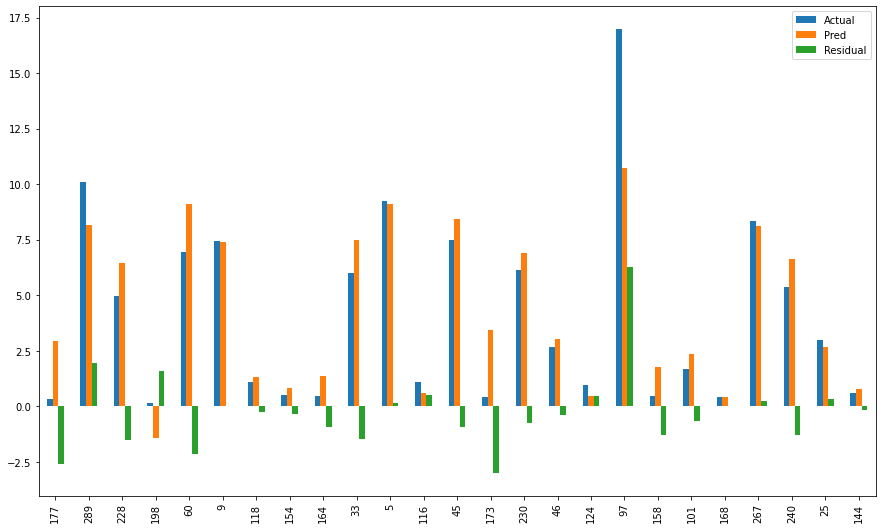

In [47]:
result_sample.plot.bar(figsize=(15,9))
plt.show()


# Model Evaluation

In [51]:
def eval_metrics(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")


In [52]:
eval_metrics(y_test, y_pred)


Model testing performance:
--------------------------
R2_score 	: 0.8489813024897549
MAE 		: 1.2162256821298347
MSE 		: 3.4788039706413962
RMSE 		: 1.8651552135523188


In [54]:
y_train_pred = lin_model.predict(X_train)


In [55]:
eval_metrics(y_train, y_train_pred)


Model testing performance:
--------------------------
R2_score 	: 0.8886517300804558
MAE 		: 1.167580444834696
MSE 		: 2.943720539963017
RMSE 		: 1.7157274084081704


In [56]:
model_scores = {"model_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "model_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
ls =pd.DataFrame(model_scores)
ls


,model_train,model_test
rmse,1.715727,1.865155
mae,1.167580,1.216226
mse,2.943721,3.478804
R2,0.888652,0.848981


# Regularization

# Ridge

In [57]:
ridge_model = Ridge(alpha=1)

In [58]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=1)

In [59]:
y_pred = ridge_model.predict(X_test)
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8501120632131467
MAE 		: 1.2114288537900069
MSE 		: 3.452756236425481
RMSE 		: 1.858159367876039


In [60]:
y_train_pred = ridge_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8884015131437717
MAE 		: 1.168677130501873
MSE 		: 2.950335539338363
RMSE 		: 1.7176540802322111


In [61]:
ridge_scores = {"ridge_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "ridge_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
rs = pd.DataFrame(ridge_scores)
rs

,ridge_train,ridge_test
rmse,1.717654,1.858159
mae,1.168677,1.211429
mse,2.950336,3.452756
R2,0.888402,0.850112


In [64]:
model = Ridge(alpha=1)
scores = cross_validate(model, X_train, y_train,
                    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [68]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:]

,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.900347,-1.451873,-4.179716,-2.044435
2,0.654007,-1.500285,-5.782670,-2.404718
3,0.818225,-1.681365,-11.109517,-3.333094
4,0.834832,-1.091568,-2.087149,-1.444697
5,0.803887,-1.272124,-4.094203,-2.023414
6,0.805688,-0.859961,-1.009681,-1.004829
7,0.859226,-1.326651,-7.323181,-2.706138
8,0.426320,-1.195132,-3.267166,-1.807530
9,0.899870,-1.263281,-2.796771,-1.672355
10,0.870952,-0.887696,-1.202186,-1.096442


In [69]:
pd.DataFrame(scores, index = range(1, 11)).iloc[:, 2:].mean()

test_r2                             0.787335
test_neg_mean_absolute_error       -1.252994
test_neg_mean_squared_error        -4.285224
test_neg_root_mean_squared_error   -1.953765
dtype: float64

In [70]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8501120632131467
MAE 		: 1.2114288537900069
MSE 		: 3.452756236425481
RMSE 		: 1.858159367876039


In [71]:
alpha_space = np.linspace(0.01, 1, 100)  # bu aralığı azaltıp arttırabilirsin. 
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [72]:
ridge_cv_model = RidgeCV(alphas = alpha_space, cv = 10, scoring = "neg_root_mean_squared_error")

In [73]:
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=10, scoring='neg_root_mean_squared_error')

In [74]:
ridge_cv_model.alpha_

1.0

In [75]:
y_pred = ridge_cv_model.predict(X_test)

In [76]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8501120632131467
MAE 		: 1.2114288537900069
MSE 		: 3.452756236425481
RMSE 		: 1.858159367876039


In [77]:
y_train_pred = ridge_cv_model.predict(X_train)
eval_metrics(y_train, y_train_pred) 

Model testing performance:
--------------------------
R2_score 	: 0.8884015131437717
MAE 		: 1.168677130501873
MSE 		: 2.950335539338363
RMSE 		: 1.7176540802322111


In [78]:
ridge_cv_scores = {"ridge_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "ridge_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
rcs = pd.DataFrame(ridge_cv_scores)
rcs

,ridge_cv_train,ridge_cv_test
rmse,1.717654,1.858159
mae,1.168677,1.211429
mse,2.950336,3.452756
R2,0.888402,0.850112


# Lasso

In [79]:
lasso_model = Lasso(alpha = 1)
lasso_model.fit(X_train, y_train)

Lasso(alpha=1)

In [80]:
y_train_pred = lasso_model.predict(X_train)

In [81]:
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.848030286813716
MAE 		: 1.2231110358007187
MSE 		: 4.017631944187324
RMSE 		: 2.004403139138263


In [82]:
y_pred = lasso_model.predict(X_test)

In [83]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.798551246128469
MAE 		: 1.471428863669146
MSE 		: 4.6404897963148
RMSE 		: 2.1541796109690576


In [84]:
lasso_scores = {"lasso_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "lasso_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
lss = pd.DataFrame(lasso_scores)
lss

,lasso_train,lasso_test
rmse,2.004403,2.154180
mae,1.223111,1.471429
mse,4.017632,4.640490
R2,0.848030,0.798551


In [85]:
pd.concat([ls, rs, rcs, lss], axis = 1)

,model_train,model_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test
rmse,1.715727,1.865155,1.717654,1.858159,1.717654,1.858159,2.004403,2.154180
mae,1.167580,1.216226,1.168677,1.211429,1.168677,1.211429,1.223111,1.471429
mse,2.943721,3.478804,2.950336,3.452756,2.950336,3.452756,4.017632,4.640490
R2,0.888652,0.848981,0.888402,0.850112,0.888402,0.850112,0.848030,0.798551


In [86]:
model = Lasso(alpha=1)
scores = cross_validate(model, X_train, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [87]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:]

,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.883049,-1.435615,-4.905248,-2.214779
2,0.696743,-1.416323,-5.068414,-2.251314
3,0.725062,-1.911275,-16.803328,-4.099186
4,0.843876,-1.044645,-1.972867,-1.404588
5,0.736887,-1.464262,-5.492953,-2.343705
6,0.817708,-0.725413,-0.947220,-0.973252
7,0.813136,-1.597788,-9.720810,-3.117821
8,0.563139,-0.931708,-2.487967,-1.577329
9,0.834202,-1.482811,-4.630980,-2.151971
10,0.873459,-0.893706,-1.178830,-1.085739


In [88]:
lasso_model.coef_

array([ 2.83120931e-01,  5.05717082e-01, -6.02109175e-06, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00])

In [90]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 10, max_iter = 100000) 

In [91]:
lasso_cv_model.fit(X_train, y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=10, max_iter=100000)

In [92]:
lasso_cv_model.alpha_

0.01

In [93]:
y_train_pred = lasso_cv_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8883375747201661
MAE 		: 1.1644092016211878
MSE 		: 2.952025883076948
RMSE 		: 1.7181460598787717


In [94]:
y_pred = lasso_cv_model.predict(X_test)
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8507917908564946
MAE 		: 1.2076443420406517
MSE 		: 3.4370983128463615
RMSE 		: 1.8539412916396143


In [95]:
lasso_cv_scores = {"lasso_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "lasso_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
lcs = pd.DataFrame(lasso_cv_scores)
lcs

,lasso_cv_train,lasso_cv_test
rmse,1.718146,1.853941
mae,1.164409,1.207644
mse,2.952026,3.437098
R2,0.888338,0.850792


In [96]:
pd.concat([ls,rs, rcs, lss, lcs], axis = 1)

,model_train,model_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test
rmse,1.715727,1.865155,1.717654,1.858159,1.717654,1.858159,2.004403,2.154180,1.718146,1.853941
mae,1.167580,1.216226,1.168677,1.211429,1.168677,1.211429,1.223111,1.471429,1.164409,1.207644
mse,2.943721,3.478804,2.950336,3.452756,2.950336,3.452756,4.017632,4.640490,2.952026,3.437098
R2,0.888652,0.848981,0.888402,0.850112,0.888402,0.850112,0.848030,0.798551,0.888338,0.850792


## Elastic-Net 

In [97]:
elastic_model = ElasticNet()
elastic_model.fit(X_train, y_train)

ElasticNet()

In [98]:
elastic_model.l1_ratio

0.5

In [99]:
elastic_model.alpha

1.0

In [100]:
y_train_pred = elastic_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8515542497169762
MAE 		: 1.2191411121564875
MSE 		: 3.924468736641389
RMSE 		: 1.9810271923023643


In [101]:
y_pred = elastic_model.predict(X_test)
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8087874396439665
MAE 		: 1.4234287536004082
MSE 		: 4.404693095422508
RMSE 		: 2.098736070929956


In [102]:
elastic_scores = {"elastic_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "elastic_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
es = pd.DataFrame(elastic_scores)
es

,elastic_train,elastic_test
rmse,1.981027,2.098736
mae,1.219141,1.423429
mse,3.924469,4.404693
R2,0.851554,0.808787


In [103]:
pd.concat([ls,rs, rcs, lss, lcs, es], axis = 1)

,model_train,model_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test
rmse,1.715727,1.865155,1.717654,1.858159,1.717654,1.858159,2.004403,2.154180,1.718146,1.853941,1.981027,2.098736
mae,1.167580,1.216226,1.168677,1.211429,1.168677,1.211429,1.223111,1.471429,1.164409,1.207644,1.219141,1.423429
mse,2.943721,3.478804,2.950336,3.452756,2.950336,3.452756,4.017632,4.640490,2.952026,3.437098,3.924469,4.404693
R2,0.888652,0.848981,0.888402,0.850112,0.888402,0.850112,0.848030,0.798551,0.888338,0.850792,0.851554,0.808787


In [104]:
elastic_model.coef_

array([ 3.36735713e-01,  5.07832721e-01, -4.21808778e-06, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00])

In [105]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space, l1_ratio=[0.1, 0.5, 0.7,0.9, 0.95, 1], cv = 10, max_iter = 100000)

In [106]:
elastic_cv_model.fit(X_train, y_train)

ElasticNetCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
             cv=10, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=100000)

In [107]:
elastic_cv_model.alpha_

0.01

In [108]:
elastic_cv_model.l1_ratio_

0.1

In [109]:
elastic_cv_model.coef_

array([ 3.61098933e-01,  4.35282527e-01, -5.77786608e-06, -7.90429588e-01,
        1.34743816e+00, -3.51942317e-01, -1.10663428e+00, -1.46915499e+00])

In [110]:
y_train_pred = elastic_cv_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8880761796379933
MAE 		: 1.1657103295824818
MSE 		: 2.958936399719849
RMSE 		: 1.7201559230836747


In [111]:
y_pred = elastic_cv_model.predict(X_test)
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8511003814665753
MAE 		: 1.2064977700030237
MSE 		: 3.429989747765681
RMSE 		: 1.852023149900044


In [112]:
elastic_cv_scores = {"elastic_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "elastic_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
ecs = pd.DataFrame(elastic_cv_scores)
ecs

,elastic_cv_train,elastic_cv_test
rmse,1.720156,1.852023
mae,1.165710,1.206498
mse,2.958936,3.429990
R2,0.888076,0.851100


In [113]:
pd.concat([ls,rs, rcs, lss, lcs, es, ecs], axis = 1)

,model_train,model_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test,elastic_cv_train,elastic_cv_test
rmse,1.715727,1.865155,1.717654,1.858159,1.717654,1.858159,2.004403,2.154180,1.718146,1.853941,1.981027,2.098736,1.720156,1.852023
mae,1.167580,1.216226,1.168677,1.211429,1.168677,1.211429,1.223111,1.471429,1.164409,1.207644,1.219141,1.423429,1.165710,1.206498
mse,2.943721,3.478804,2.950336,3.452756,2.950336,3.452756,4.017632,4.640490,2.952026,3.437098,3.924469,4.404693,2.958936,3.429990
R2,0.888652,0.848981,0.888402,0.850112,0.888402,0.850112,0.848030,0.798551,0.888338,0.850792,0.851554,0.808787,0.888076,0.851100


In [ ]:
yüzde 10 lasso yüzde 90 ridge... Elastic model. 